In [1]:
import numpy as np
import matplotlib.pyplot as plt

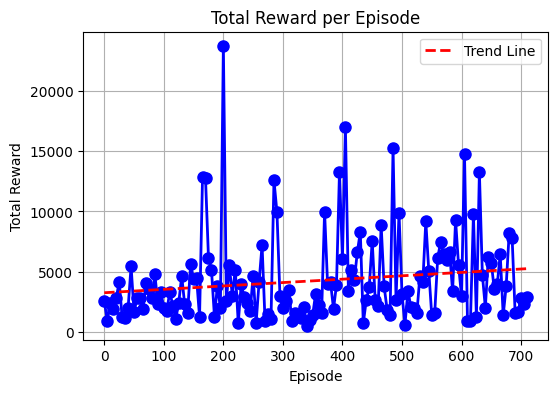

In [2]:
"""
Gráfico del proceso de training. Una partida por modelo.
"""

#Primer training del Q learning
from scipy.stats import linregress

# Open the text file in read mode
with open('../gifs_imgs_txts/training_q_learn.txt', 'r') as file:
    lines = file.readlines()

# Extract the last numbers from each line and store them in a list
rewards = [float(line.split()[-1].replace('Total', '').replace('Reward:', '').strip()) for line in lines]

# Plot the rewards
episodes = [5*i for i in range(len(rewards))]
plt.figure(figsize=(6, 4))
plt.plot(episodes, rewards, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Fit a polynomial of degree 1 (linear polynomial) to the data
coefficients = np.polyfit(episodes, rewards, 1)
trend_line = np.polyval(coefficients, episodes)
plt.plot(episodes, trend_line, color='r', linestyle='--', linewidth=2, label='Trend Line')

plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.grid(True)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


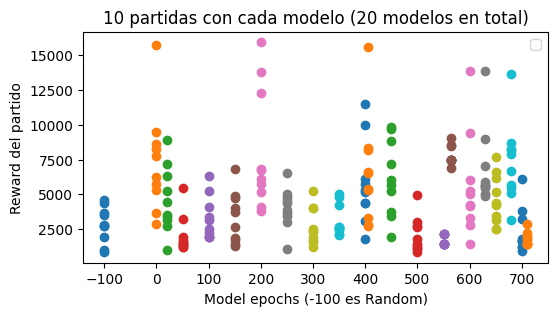

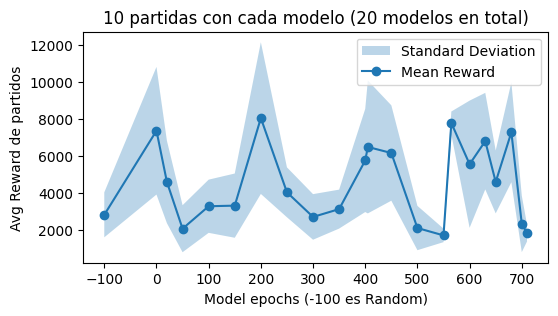

In [3]:
"""
Gráficos de más partidas de algunos modelos seleccionados. 
Muestra que no es tan claro que haya un aprendizaje. 
Algunos exhiben comportamiento inteligente y otros quedan trabados eligiendo siempre una acción.
"""

with open('../gifs_imgs_txts/log_tests_some_models.txt', 'r') as file:
    lines = file.readlines()

# Parse data
model_rewards = {}
current_model = None

for line in lines:
    if line.startswith('Using model') or line.startswith('Imported model'):
        current_model = int(line.split()[-1])
        model_rewards[current_model] = []
    elif line.startswith('Game ended! Total reward:'):
        total_reward = float(line.split()[-1])
        model_rewards[current_model].append(total_reward)

# Plotting
plt.figure(figsize=(6, 3))

for model, rewards in model_rewards.items():
    #plt.plot([model] * len(rewards), rewards, 'o', label=f'Model {model}')
    plt.plot([model] * len(rewards), rewards, 'o')


plt.xlabel('Model epochs (-100 es Random)')
plt.ylabel('Reward del partido')
plt.title('10 partidas con cada modelo (20 modelos en total)')
plt.legend()
plt.show()

# Calculate mean and standard deviation for each model
mean_rewards = []
std_dev_rewards = []
model_numbers = sorted(model_rewards.keys())

for model in model_numbers:
    rewards = model_rewards[model]
    mean_rewards.append(np.mean(rewards))
    std_dev_rewards.append(np.std(rewards))

# Plotting
plt.figure(figsize=(6, 3))

plt.fill_between(model_numbers, np.array(mean_rewards) - np.array(std_dev_rewards),
                 np.array(mean_rewards) + np.array(std_dev_rewards), alpha=0.3, label='Standard Deviation')
plt.plot(model_numbers, mean_rewards, 'o-', label='Mean Reward')

plt.xlabel('Model epochs (-100 es Random)')
plt.ylabel('Avg Reward de partidos')
plt.title('10 partidas con cada modelo (20 modelos en total)')
plt.legend()
plt.show()

Modelo 0 (primer epoch)
Toma siempre las mismas acciones


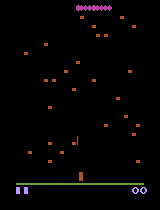

Modelo 200
Es rigido pero responde a la ubicación del centipede por momentos


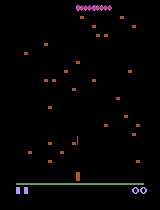

Modelo 630
Es el modelo que más responde a la posición del centipede y la araña. No necesariamente el que más reward obtiene.
Es el que elegí para mi agente. Este es un partido particularmente bueno


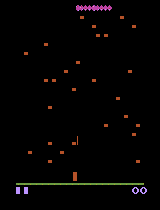

Modelo 710
Nuevamente rígido


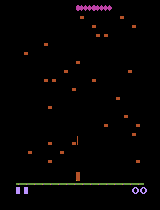

In [4]:
"""
Visualizo algunos partidos ejemplos de modelos que destacan durante el entrenamiento. 
"""

from IPython.display import display, Image

print("Modelo 0 (primer epoch)")
print("Toma siempre las mismas acciones")
display(Image(filename='../gifs_imgs_txts/model_0.gif'))
print("Modelo 200")
print("Es rigido pero responde a la ubicación del centipede por momentos")
display(Image(filename='../gifs_imgs_txts/model_200.gif'))
print("Modelo 630")
print("Es el modelo que más responde a la posición del centipede y la araña. No necesariamente el que más reward obtiene.")
print("Es el que elegí para mi agente. Este es un partido particularmente bueno")
display(Image(filename='../gifs_imgs_txts/model_630b.gif'))
print("Modelo 710")
print("Nuevamente rígido")
display(Image(filename='../gifs_imgs_txts/model_710.gif'))